# Изучение рынка продаж компьютерных игр для планирования рекламной кампании интернет-магазина "стримчик" на 2017г

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Нам необходимо выявить определяющие успешность игры закономерности. 
Цель исследования - прогноз потенциально популярного на 2017г продукта для дальнейшего планирования рекламных кампаний на 2017г.   
Исследование будет включать в себя следующие этапы:   
1.изучение общей информации   
2.предобработка данных    
3.исследовательский анализ данных   
4.составление портрета пользователя для разных регионов   
5.проверка гипотез

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    print("could not open the file")

In [3]:
data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице data есть пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
User_Score имеет строковый тип данных, необходимо заменить его на float. Похоже, что все значения в столбце Critic_Score целые, значит можно заменить их на int, так будет экономнее для памяти. Со столбцом Year_of_Release стоит сделать то же самое.
Кроме того, как мы видим, необходимо заменить названия столбцов, приведя их к нижнему регистру


### Предобработка данных

Приведём названия столбцов к нижнему регистру

In [5]:
data.columns = map(str.lower, data.columns)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразуем типы данных в столбцах

In [6]:
try:
    data = data.astype({'critic_score': "Int64"})
except:
    print('failed critic_score')


try:
    data=data.astype({'year_of_release': 'Int64'})
except:
    print('failed year_of_release')

try:
    data = data.astype({'user_score': 'float64'})
except:
    print('failed user_score')


failed user_score


Ячейка ругается на failed user_score и не хочет менять тип данных. Попробуем разобраться в чём дело

In [7]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди данных оказался некто "tbd", что, видимо, означает "To Be Determined". Думаю, можно заменить его NaN-ом.

In [8]:
data['user_score'] = data['user_score'].replace({'tbd' : np.NaN})

In [9]:
try:
    data = data.astype({'user_score': 'float64'})
except:
    print("failed user_score")

In [10]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

порядок

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Похоже, всё получилось

Обработаем оставшиеся пропуски. В колонке name отсутствуют всего два значения. Вряд ли их как-либо можно восстановить, кроме того, отсутствие двух значений не повлияет критически на наши данные. Поэтому, просто удалим эти строки.

In [12]:
data.dropna(subset = ['name'], inplace = True)

Посмотрим пропуски в year_of_release

In [13]:
data['year_of_release'].sort_values().unique()


<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, <NA>]
Length: 38, dtype: Int64

In [14]:
data['year_of_release'].isna().sum()

269

По сравнению с 16713 это менее двух процентов. Не очень много. Поэтому удалим строки с пропусками.

In [15]:
data.dropna(subset=['year_of_release'], inplace = True)

Рассмотрим столбец genre

In [16]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [17]:
data['genre'].isna().sum()

0

Похоже пропуски в столбце genre удалились вместе со строками во время более ранних удалений. Проблема решилась сама. Оставляем этот столбец без изменений. Рассмотрим столбец critic_score

In [18]:
data['critic_score'].sort_values().unique()

<IntegerArray>
[  13,   17,   19,   20,   21,   23,   24,   25,   26,   27,   28,   29,   30,
   31,   32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
   44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,   56,
   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
   70,   71,   72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
   83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,   94,   95,
   96,   97,   98, <NA>]
Length: 82, dtype: Int64

In [19]:
data['critic_score'].isna().sum()

8461

Около половины пропусков. При этом заменять пропуски не стоит, так как можно изменить общую картину. 
Посмотрим user_score.

In [20]:
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [21]:
data['user_score'].isna().sum()

8981

Тоже больше половины и тоже, думаю менять не стоит. Заполнение медианой или средним такого количества данных может очень утрировать данные и изменить картину. Причиной таких пропусков может быть как банальное нежелание пользователя ставить отметку так и отсутствие возможности это сделать, например, в случаях игр, выпущенных до 1994г. Смотрим rating

In [22]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [23]:
data['rating'].isna().sum()

6676

В описании проекта заявлено, что рейтинг проставляла компания ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». Если посмотреть, что по поводу этой компании пишут, например, в Википедии, то узнаем следующее: 
"ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association". При этом игры, представленные в нашей таблице выпускаются с 1980 г. Логично, что многое не попало в рейтинг, поскольку его тогда еще не существовало. Возможно также, что игра выпущена недавно, и еще не попала в рейтинг.
Кроме того, указано, что рейтинг «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"). Получается, что "Е" и "К-А" - это одна и та же категория. Имеет смысл объединить их под одним рейтингом "Е".

In [24]:
data['rating'] = data['rating'].str.replace("K-A", "E")
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
check = data.query('year_of_release < 1995')
check['rating'].isna().sum()

481

In [26]:
check1 = data.query('year_of_release < 2001 and year_of_release> 1994')
check1['rating'].isna().sum()

1590

In [27]:
check3 = data.query('year_of_release < 2005 and year_of_release> 2000')
check3['rating'].isna().sum()

643

In [28]:
check2 = data.query('year_of_release >2015')
check['rating'].isna().sum()

481

Похоже, дело не только в том, что игра была выпущена раньше основания рейтинговой компании и не только в том, что данные за 2016г неполные. Большое количество пропусков приходится на период до 2000г. 
Во многие игры тогда играли локально и, вероятно, не особо оставляли свои отзывы в сети. 
Думаю, можно заменить пропуски на WC, что означает "without category"

In [29]:
data['rating'] = data['rating'].replace({np.nan:'WC'})
data['rating'].unique()

array(['E', 'WC', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Удалим дубликаты, если таковые есть

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


In [31]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


Похоже что дубликатов не было.

Посчитаем суммарные продажи во всех регионах и сформируем новый столбец.

In [32]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,WC,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,WC,31.38


In [33]:
data_drop = data.dropna(subset=['critic_score']).dropna(subset = ['user_score']).dropna(subset = ['rating'])
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6894 non-null   object 
 1   platform         6894 non-null   object 
 2   year_of_release  6894 non-null   Int64  
 3   genre            6894 non-null   object 
 4   na_sales         6894 non-null   float64
 5   eu_sales         6894 non-null   float64
 6   jp_sales         6894 non-null   float64
 7   other_sales      6894 non-null   float64
 8   critic_score     6894 non-null   Int64  
 9   user_score       6894 non-null   float64
 10  rating           6894 non-null   object 
 11  total_sales      6894 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 713.6+ KB


Вывод:
Названия столбцов были приведены к нижнему регистру. В столбцах year_of_release и critic_score тип данных был заменён на int. Тип данных в столбце user_score был переведен во float. Предварительно в этом столбце данные "tbd" были заменены NaN-ом. В некоторых столбцах отсутсвовали пропуски. Особенно много их в столбцах "user_score", "critic_score", "rating". В столбце 'rating' пропуски заменила значением "wc" - without cathegory. Для замены данных в  столбцах "user_score", "critic_score" у нас с одной стороны недостаточно данных, а с другой они индивидуальны, поэтому применение медианного или среднего значения может сильно сместить акценты относительно реальной картины. Пропуски в столбцах "year_of_release" и "name" привели к удалению строк с этими столбцами. В таблицу был добавлен столбец "total_sales" с суммой продаж по всем регионам. 


### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

<AxesSubplot:xlabel='year_of_release'>

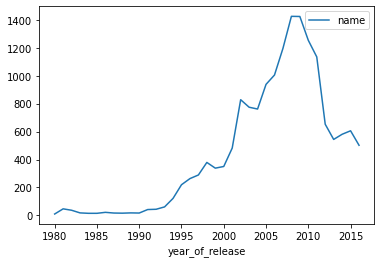

In [34]:
pd.pivot_table(data, index = 'year_of_release', values = 'name', aggfunc = 'count').plot()

Как видим, до 1996г особых изменений на графике нет. После 1999г идет резкий скачок в сторону увеличения выпуска игр. Скорее всего это связано с ростом количества персональных компьютеров и игровых приставок у населения. После 2007 наблюдается спад выпуска, видимо связанный с появлением мобильных игр. Думаю, данные до 1998г не важны.

Посмотрим как менялись продажи по платформам. Найдём самые продаваемые.

In [35]:
platform_pivot = pd.pivot_table(data, index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
platform_pivot

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<AxesSubplot:xlabel='platform'>

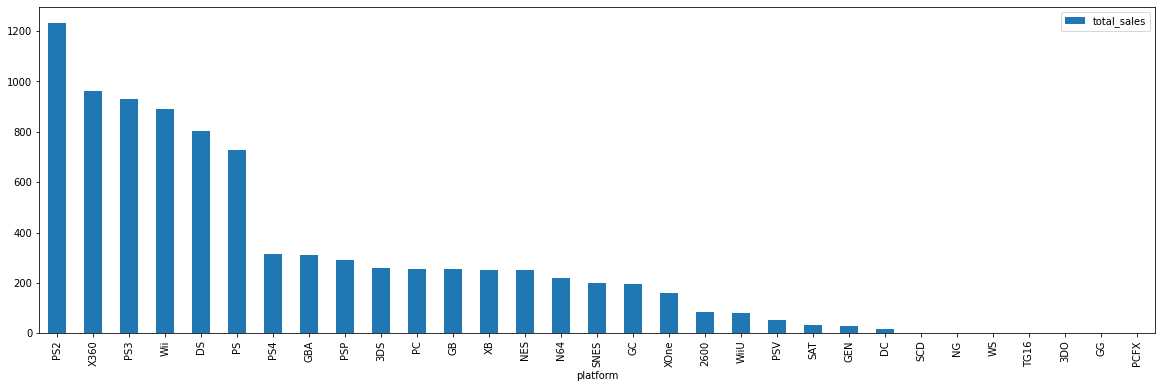

In [36]:
platform_pivot.plot(kind = 'bar', figsize = (20,6))

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Очевидно, что у нас есть шесть лидеров.

In [37]:
top_sales_platform = platform_pivot[:6]
top_sales_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


<AxesSubplot:xlabel='year_of_release'>

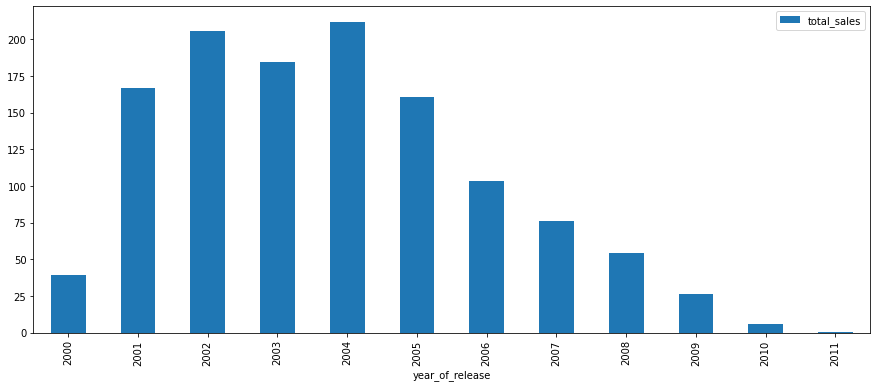

In [38]:
data[data['platform'] == 'PS2'].pivot_table(index = 'year_of_release', values = "total_sales", aggfunc = 'sum').plot(kind = 'bar', figsize = (15, 6))


В отношении PS2 можно сказать, что пик её популярности пришёлся на 2001-2005гг. Платформа продержалась с 2000 по 2010г, сильно теряя в популярности с 2006г

<AxesSubplot:xlabel='year_of_release'>

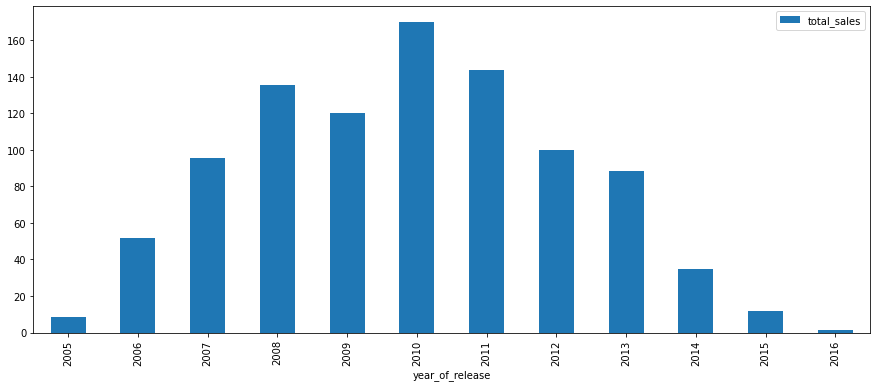

In [39]:
data[data['platform'] == 'X360'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar',figsize = (15,6))

Платформа 'X360' продавалась с 2005 по 2016гг. Максимум продаж приходится на период 2008-2011гг. Резкое падение популярности в 2014г.

<AxesSubplot:xlabel='year_of_release'>

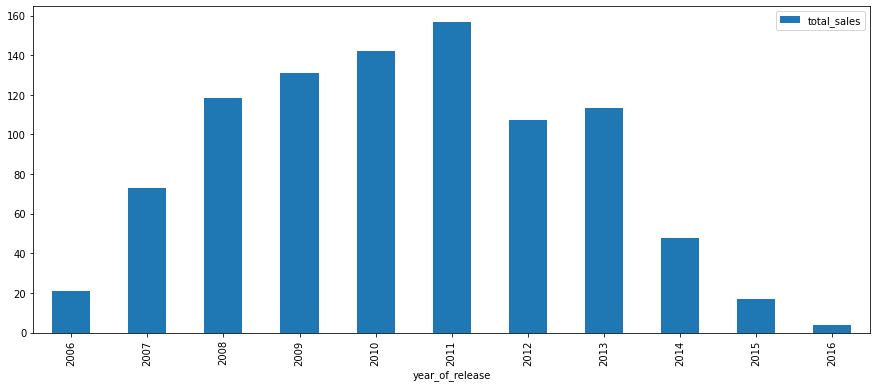

In [40]:
data[data['platform'] == 'PS3'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (15,6))

Платформа PS3 просуществовала с 2006 по 2016г, максимальные продажи отслеживаются с 2008 по 2013гг, в 2013 - резкое падение популярности.

<AxesSubplot:xlabel='year_of_release'>

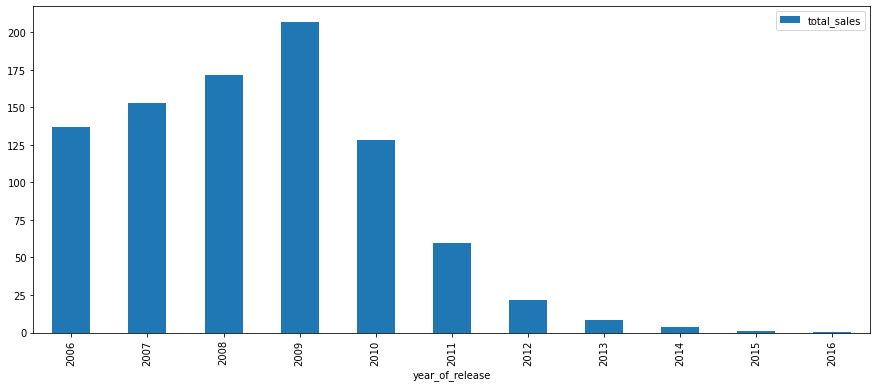

In [41]:
data[data['platform'] == 'Wii'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (15,6))

 Платформа Wii была популярна с 2006 по 2011гг, максимум продаж приходится на 2007-2009гг. Резкое падение спроса в 2011г.

<AxesSubplot:xlabel='year_of_release'>

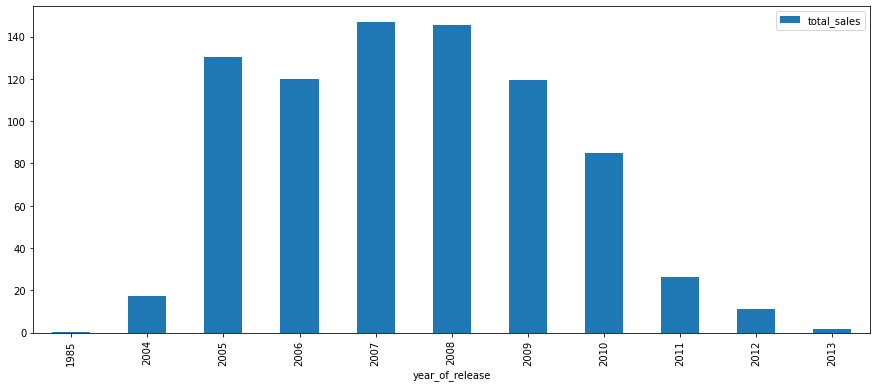

In [42]:
data[data['platform']=='DS'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (15,6))

максимум продаж платформы DS пришёлся на 2005-2010гг.

На графике мы видим выбивающееся значение 1985г. Скорее всего это ошибка, так как первый её выпуск датируется 2004г. Нужно убрать.

In [43]:
data.drop(index = data.query('platform == "DS" and year_of_release == 1985').index, inplace=True)

<AxesSubplot:xlabel='year_of_release'>

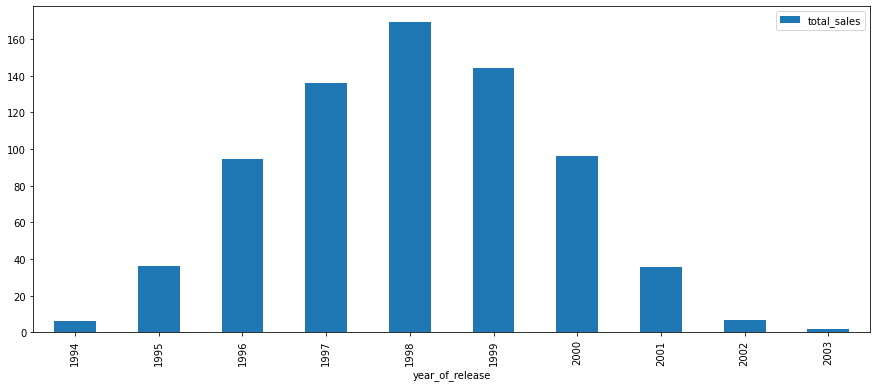

In [44]:
data[data['platform'] == 'PS'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (15,6))

Максимум продаж платформы  PS приходится на 1996-2000гг с пиком в 1998г.

Исходя из данных по платформам с наибольшими продажами, средний срок жизни платформы 10-11лет.  Максимальный спрос на платформу составляет 5-7 лет. Первый год-два продажи низкие, скорее всего это может быть связано с высокой ценой на старте продаж.

За актуальный период я бы взяла 2014-2016гг, так как средняя продолжительность жизни платформы небольшая, ситуация с продажами меняется довольно быстро, а потому самая свежая информация будет наиболее точно отображать динамику и уберёт производителей, которые покинули рынок.

In [45]:
data_from_2015 = data[data['year_of_release'] > 2014]
data_from_2015.reset_index(drop = True, inplace = True)
data_from_2015.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,WC,14.63
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,WC,7.98
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,WC,7.39


In [46]:
data_from_2015['platform'].unique()

array(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

В нашем распоряжении десять платформ

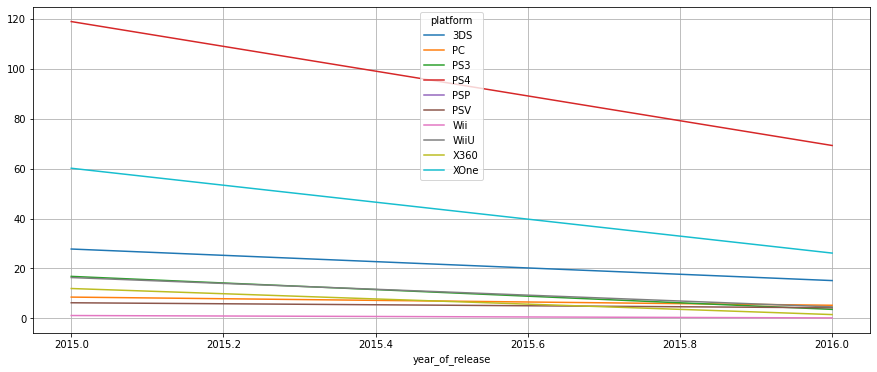

In [47]:
data_from_2015.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize = (15,6), grid = True)
plt.show()

На графике мы наблюдаем падение продаж всех платформ, семь из них находятся ниже уровня 20млн проданных копий и продолжают падать. Только PSV стабильно держится на уровне около 6 млн, возможно продажи только начались, надо посмотреть.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

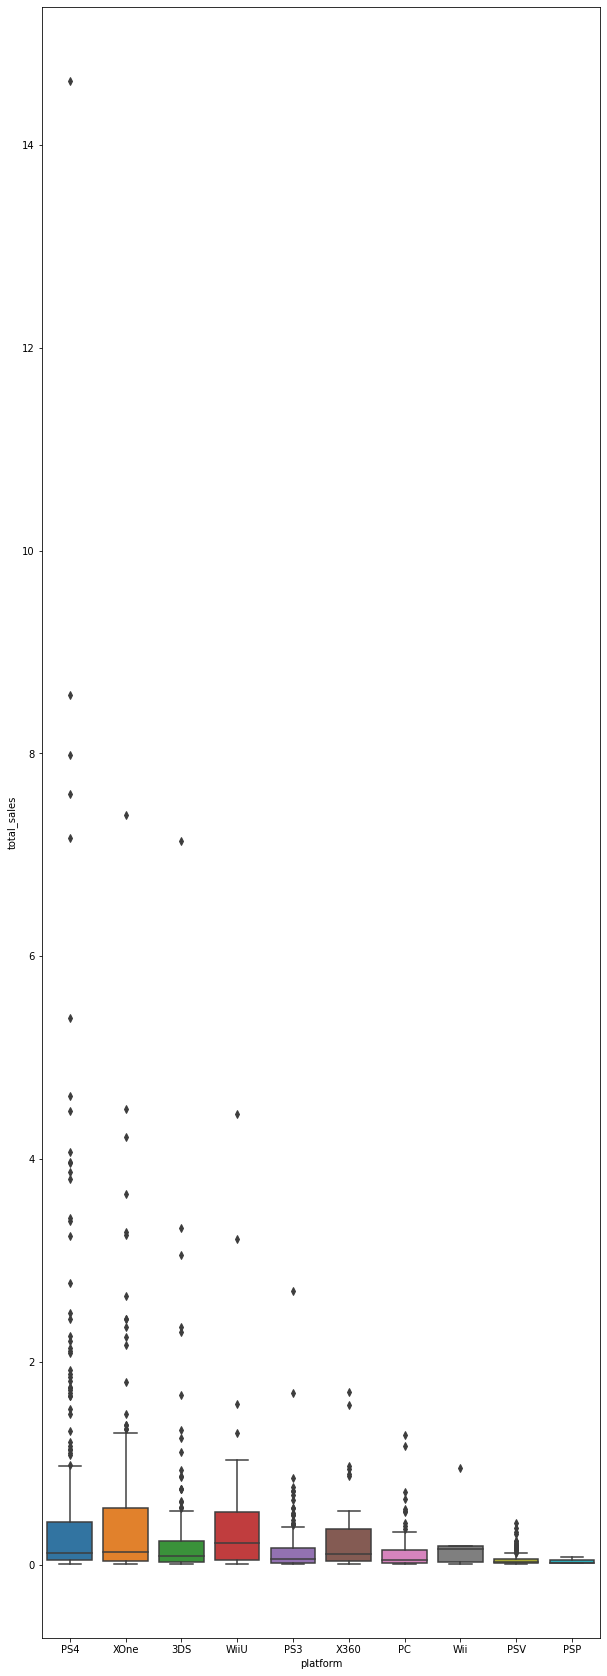

In [48]:
plt.figure(figsize = (10,30))
sns.boxplot(x = 'platform', y = 'total_sales', data = data_from_2015)

Из графика видно, что в лидерах у нас "PS4", "XOne", "WiiU". Также можем наблюдать выбросы, которые могут быть связаны с ажиотажем перед праздниками, распродажами или с выпуском ожидаемых игр. 

<AxesSubplot:xlabel='year_of_release'>

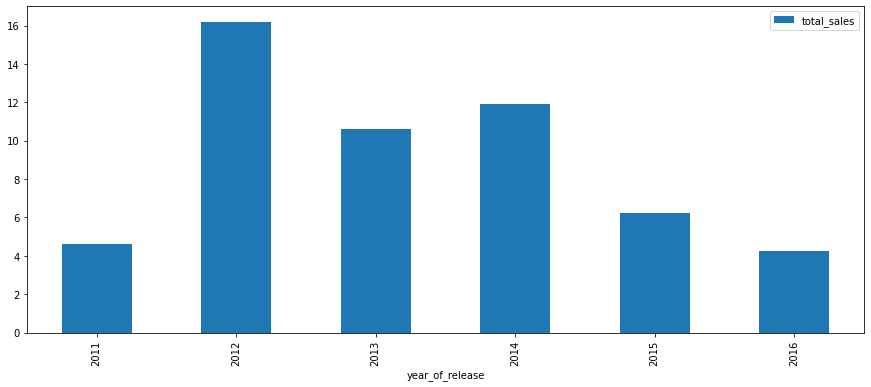

In [49]:
data[data['platform'] == "PSV"].pivot_table(index = 'year_of_release', values = "total_sales", aggfunc = 'sum').plot(kind = 'bar', figsize =  (15,6))


<AxesSubplot:xlabel='year_of_release'>

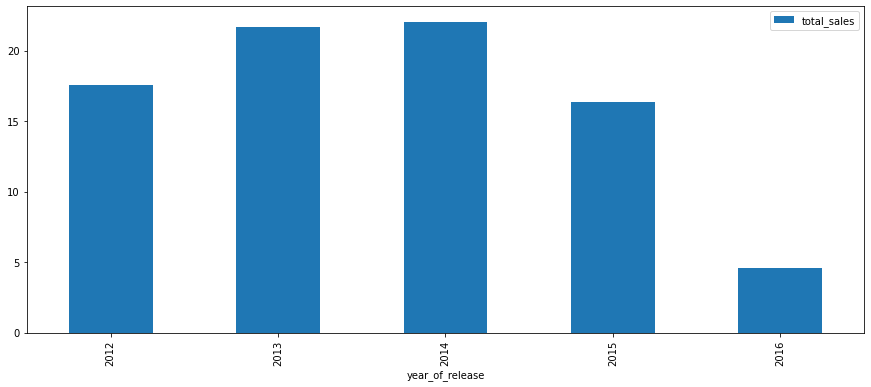

In [50]:
data[data['platform'] == 'WiiU'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (15,6))

Похоже, что "PSV" миновали пик своих продаж  в 2012, "Wuii" - в 2014 и на данный момент не являются перспективными. С высоким уровнем продаж остаются три платформы: "3DS", "XOne", "PS4". И, хотя скорость падения продаж у "3DS" медленнее, всё-таки его уровень значительно ниже среди первой тройки. Для дальнейшего изучения оставлю "XOne" и "PS4", считая их потенциально прибыльными.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмём для этого отобранную ранее "PS4". Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [51]:
data_ps4 = data[data['platform'] == "PS4" ]

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

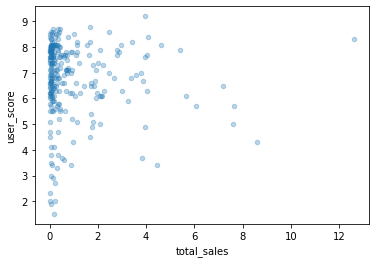

In [52]:
data_ps4.plot(x = 'total_sales', y = 'user_score', alpha = 0.3, kind = 'scatter')

In [53]:
print(f"Корреляция рассеяния между отзывами пользователей и уровнем продаж платформы ps4 равна {data_ps4['total_sales'].corr(data_ps4['user_score']):0.1%}")

Корреляция рассеяния между отзывами пользователей и уровнем продаж платформы ps4 равна -3.2%


<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

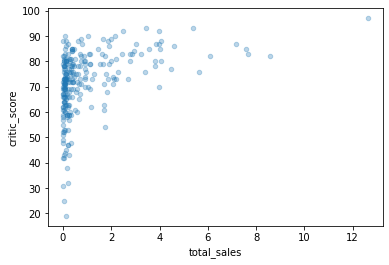

In [54]:
data_ps4.plot(x = 'total_sales', y = 'critic_score', alpha = 0.3, kind = 'scatter')

In [55]:
correl = data_ps4['critic_score'].astype("float").corr(data_ps4['total_sales'])
print(f"Корреляция рассеяния между отзывами критиков и уровнем продаж платформы PS4 равна {correl:0.1%}")

Корреляция рассеяния между отзывами критиков и уровнем продаж платформы PS4 равна 40.7%


По результатам исследования видно, что существует умеренная корреляция в размере 40,7% между отзывами критиков и уровнем продаж платформы PS4, но между отзывами пользователей и продажами такой корреляции не наблюдается, там она слабоотрицательная -3,2%.

Соотнесём выводы с продажами игр на других платформах. Для этого возьмём платформы из data_from_2015

PS4
Корреляция рассеяния между отзывами критиков и уровнем продаж платформы равна 40.7%
PS4
Корреляция рассеяния между отзывами игроков и уровнем продаж платформы равна -3.2%



XOne
Корреляция рассеяния между отзывами критиков и уровнем продаж платформы равна 41.7%
XOne
Корреляция рассеяния между отзывами игроков и уровнем продаж платформы равна -6.9%



3DS
Корреляция рассеяния между отзывами критиков и уровнем продаж платформы равна 34.9%
3DS
Корреляция рассеяния между отзывами игроков и уровнем продаж платформы равна 22.2%



WiiU
Корреляция рассеяния между отзывами критиков и уровнем продаж платформы равна 34.8%
WiiU
Корреляция рассеяния между отзывами игроков и уровнем продаж платформы равна 40.0%



PS3
Корреляция рассеяния между отзывами критиков и уровнем продаж платформы равна 43.3%
PS3
Корреляция рассеяния между отзывами игроков и уровнем продаж платформы равна 12.8%



X360
Корреляция рассеяния между отзывами критиков и уровнем продаж платформы равна 39.3%
X360
Корреляция р

<Figure size 1080x432 with 0 Axes>

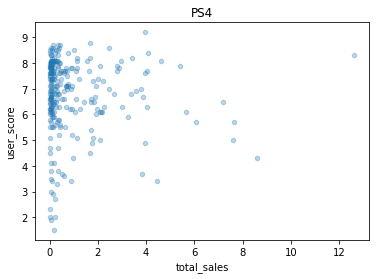

<Figure size 1080x432 with 0 Axes>

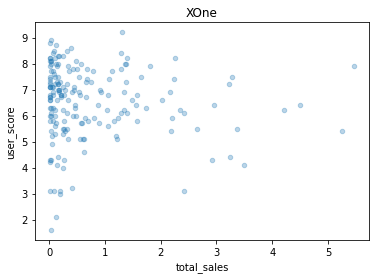

<Figure size 1080x432 with 0 Axes>

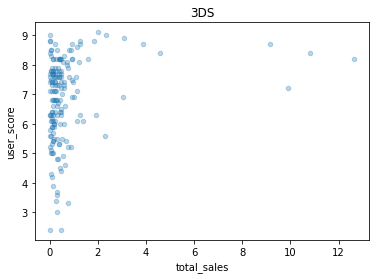

<Figure size 1080x432 with 0 Axes>

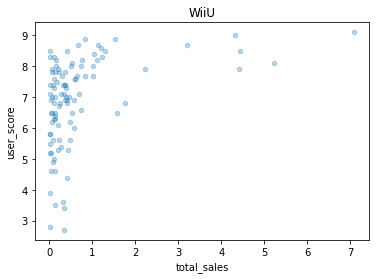

<Figure size 1080x432 with 0 Axes>

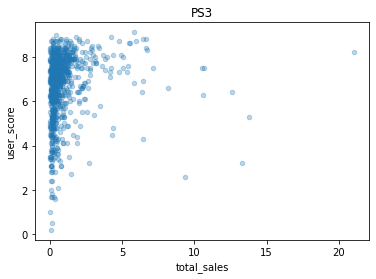

<Figure size 1080x432 with 0 Axes>

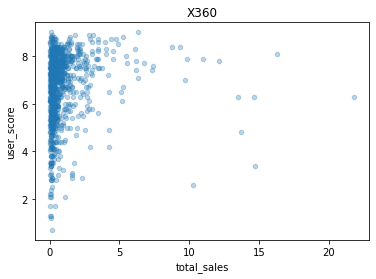

<Figure size 1080x432 with 0 Axes>

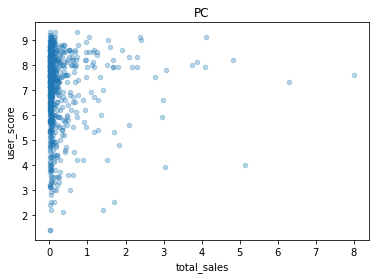

<Figure size 1080x432 with 0 Axes>

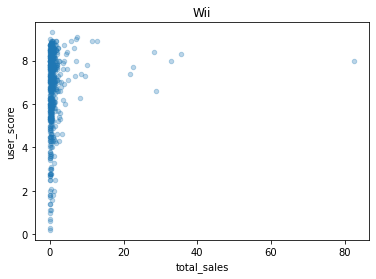

<Figure size 1080x432 with 0 Axes>

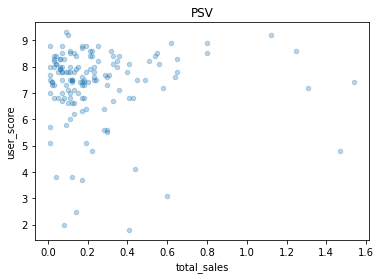

<Figure size 1080x432 with 0 Axes>

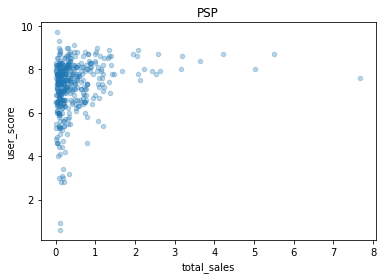

In [56]:
plat_from_2015 = data_from_2015['platform'].unique()
plat_from_2015
for plat in plat_from_2015:
    data_plat = data[data['platform'] == plat]
    plt.figure(figsize = (15,6))
    data[data['platform'] == plat].plot(x = 'total_sales', y = 'user_score', alpha = 0.3, kind = 'scatter')
    plt.title(plat)
    print(plat)
    correl = data_plat['critic_score'].astype("float").corr(data_plat['total_sales'])
    print(f"Корреляция рассеяния между отзывами критиков и уровнем продаж платформы равна {correl:0.1%}")
    print(plat)
    correl = data_plat['user_score'].corr(data_plat['total_sales'])
    print(f"Корреляция рассеяния между отзывами игроков и уровнем продаж платформы равна {correl:0.1%}")
    print('\n'*2)
    

Из проведённого анализа можно сделать вывод, что положительная корреляция рассеяния между отзывами критиков и уровнем продаж существует, она колеблется в пределах от 13,2% до 43,3%. Корреляция между отзывами потребителей и продажами обычно ниже и может быть как положительной, так и отрицательной и колеблется в пределах от -6,9% до 40%. Это может быть связано с тем,  что игроки оставляют больше отрицательных отзывов.

Посмотрим на общее распределение игр по жанрам. Сформируем своё мнение о самых прибыльных жанрах. Выделяются ли жанры с высокими и низкими продажами?

In [57]:
data_from_2015['genre'].unique()

array(['Shooter', 'Sports', 'Role-Playing', 'Action', 'Platform',
       'Simulation', 'Fighting', 'Racing', 'Adventure', 'Misc',
       'Strategy', 'Puzzle'], dtype=object)

<AxesSubplot:ylabel='total_sales'>

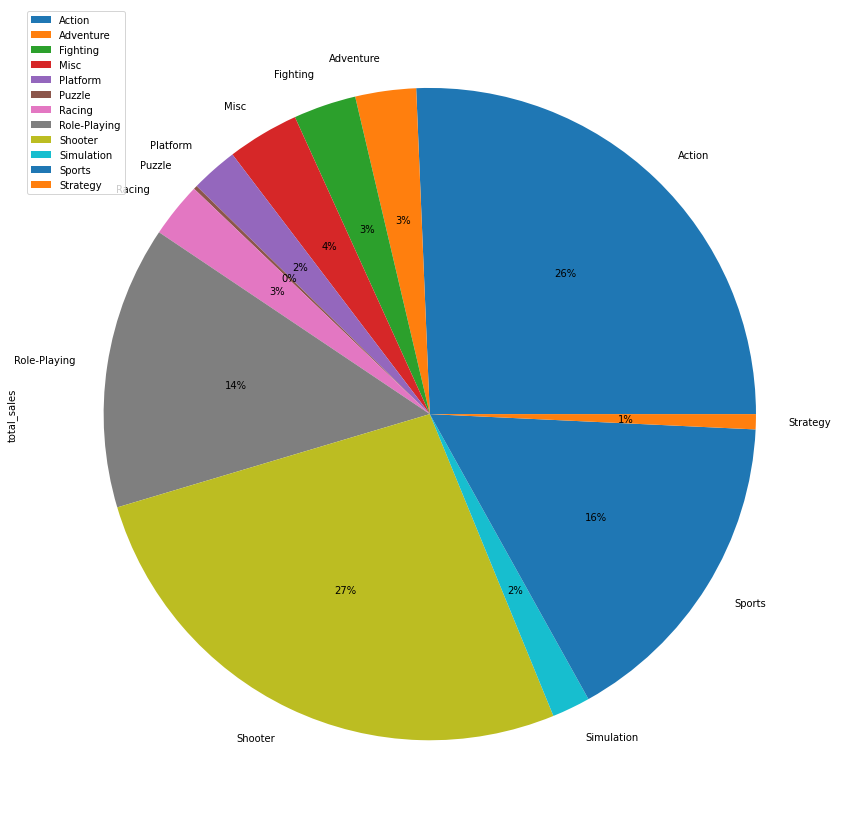

In [58]:
data_from_2015.groupby(['genre']).sum().plot(kind = 'pie', y = 'total_sales', autopct='%1.0f%%', figsize=(15,15))

Прослеживается явная зависимость между жанром и продажами. Самыми прибыльными являются жанры:'Shooter'(27%), 'Sports'(16%) и 'Action'(26%). Реже всего покупают 'Strategy'(1%), 'Puzzle'(<1%), 'Platform'(2%) и 'Simulation'(2%).

Поскольку общие продажи не показывают всю картину прибыльности жанра и могут скрывать за спиной нескольких прибыльных игр из одного жанра много неудачных игр с плохими показателями, то рассмотрим ещё медианные продажи.

In [59]:
genre_from_15 = pd.pivot_table(data_from_2015, index = 'genre', values = 'total_sales', aggfunc = {'total_sales':['median', 'mean','sum']})
genre_from_15.sort_values(by = 'median', ascending=False)

,mean,median,sum
genre,,,
Shooter,1.305309,0.380,105.73
Sports,0.601215,0.120,64.33
Role-Playing,0.422879,0.115,55.82
Platform,0.331429,0.100,9.28
Simulation,0.228788,0.100,7.55
Fighting,0.334324,0.090,12.37
Action,0.236961,0.060,102.13
Misc,0.199577,0.060,14.17
Racing,0.258571,0.055,10.86


Дополним картину с помощью диаграммы размаха.

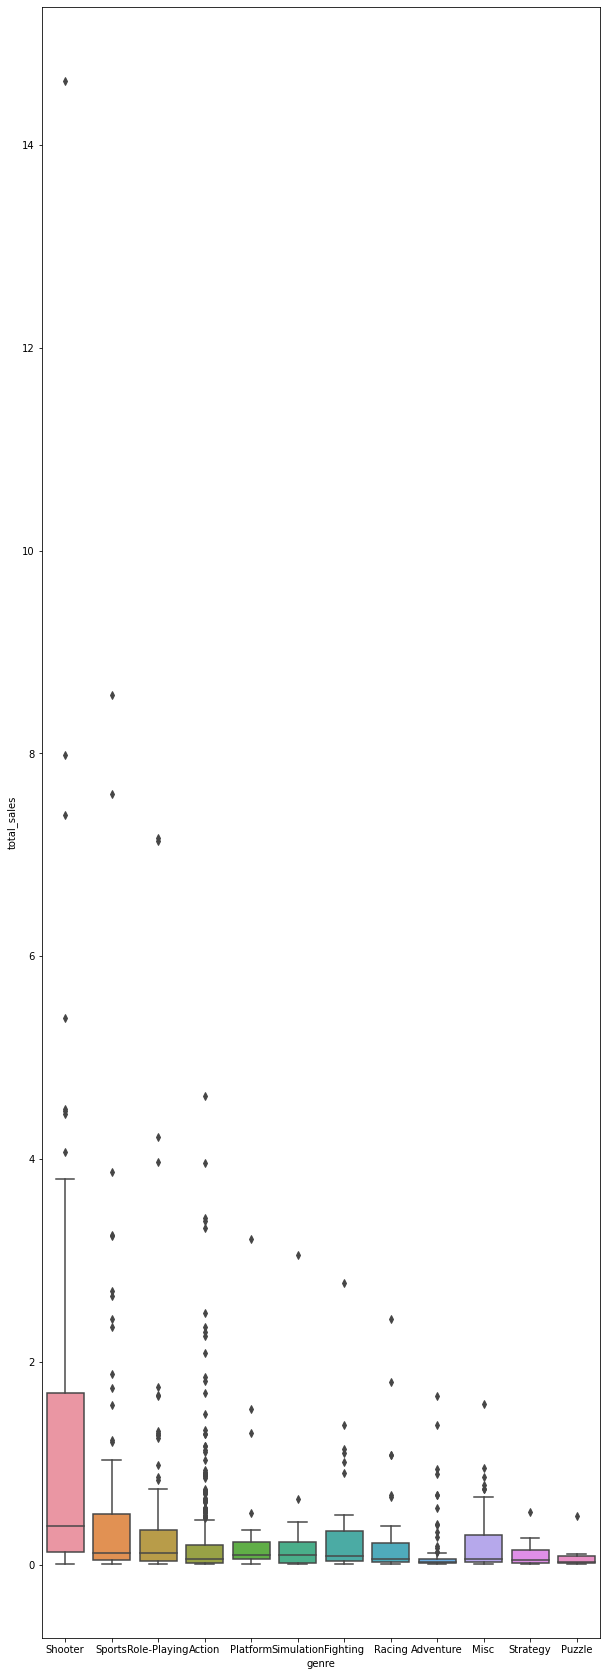

In [60]:
plt.figure(figsize = (10,30))
sns.boxplot(data=data_from_2015, x='genre', y='total_sales');


После изучения медианных продаж  по жанрам, можно сказать, что, не смотря на большие выбросы, самым перспективным жанром являются стрелялки, следом идут "Sports" и "Role-Playing". Хуже всего продаются "Adventure" и "Puzzle".

Вывод:   
По результатам исследовательского анализа данных, был выбран актуальный период для дальнейшего построения прогноза на 2017г. Это 2015-2016г. Самыми потенциально прибыльными признаны "XOne" и "PS4". Была исследована корреляция между отзывами игроков, критиков и уровнем продаж. По результатам можно сказать, что во всех случаях между отзывами критиков и уровнем продаж существует положительная корреляция. Между отзывами игроков и уровнем продаж картина разниться в зависимости от платформы. Мы наблюдали как отрицательную корреляцию ("XOne" и "PS4"), так и положительную, достигающую 40% на платформе "WiiU".
Самыми прибыльными среди жанров, оказались жанры 'Shooter','Sports', 'Role-Playing'. Наименее перспективные "Puzzle" и "Adventure".

### Составим портрет пользователя каждого региона для Европы, Японии и Северной Америки

Европа

In [61]:
evro_data = data_from_2015.query('eu_sales != 0')
evro_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,WC,14.63
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,WC,7.98
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,WC,7.39


In [62]:
evro_data_platform = pd.pivot_table(evro_data, index = 'platform', values = 'eu_sales', aggfunc ={'eu_sales': ['sum', 'median']}).sort_values('median', ascending = False)
evro_data_platform


,median,sum
platform,,
PS4,0.130,83.54
Wii,0.110,0.73
WiiU,0.100,6.49
XOne,0.065,28.10
3DS,0.050,7.39
PS3,0.050,7.30
X360,0.045,4.21
PC,0.040,9.10
PSV,0.025,1.08


<AxesSubplot:ylabel='total_sales'>

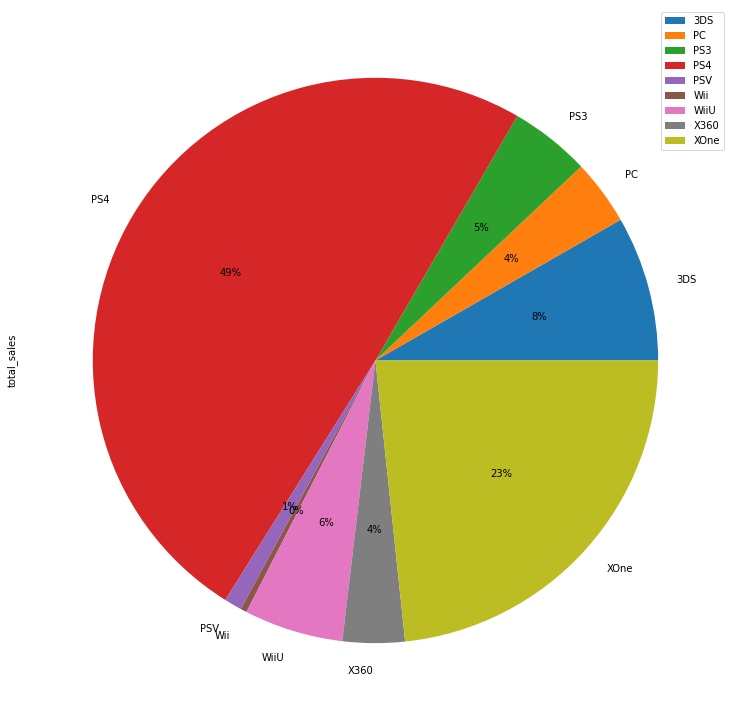

In [63]:
evro_data.groupby(['platform']).sum().plot(kind = 'pie', y = 'total_sales', autopct = '%1.0f%%', figsize=(13,13))


Как видим, европейцы предпочитают "PS4" почти в половине случаев. Еще 23% выбирают платформу "XOne". Совсем уж непопулярна платформа "Wii"(<1%).

In [64]:
evro_data_genre = pd.pivot_table(evro_data, index = "genre", values = 'eu_sales', aggfunc ={'eu_sales': ['sum', 'median']}).sort_values('median', ascending = False)
evro_data_genre

,median,sum
genre,,
Shooter,0.210,40.28
Fighting,0.095,3.72
Simulation,0.080,3.74
Misc,0.070,4.26
Platform,0.070,3.20
Role-Playing,0.070,17.21
Action,0.050,34.82
Racing,0.050,6.52
Sports,0.050,27.82


<AxesSubplot:ylabel='total_sales'>

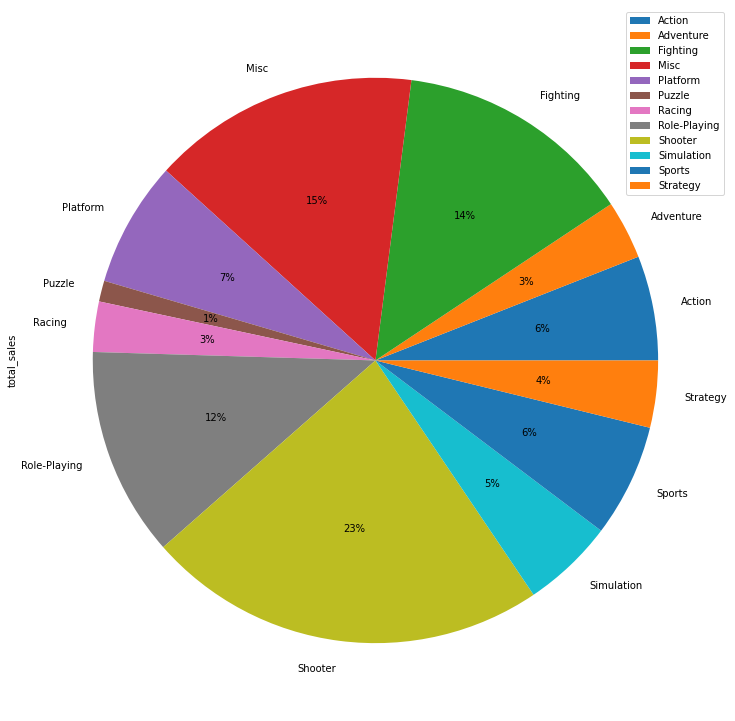

In [65]:
evro_data.groupby(['genre']).median().plot(kind = 'pie', y = 'total_sales', autopct = '%1.0f%%', figsize=(13,13) )

Самыми популярными играми у европейцев на 2015-2016гг являются стрелялки (23%), "Misc" (15%), "Fighting"(14%) а самыми непопулярными головоломки(1%).

In [66]:
evro_data_genre = pd.pivot_table(evro_data[evro_data['rating']!='WC'], index = "rating", values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
evro_data_genre

,eu_sales
rating,
M,45.54
E,34.83
T,20.32
E10+,11.54


<AxesSubplot:ylabel='total_sales'>

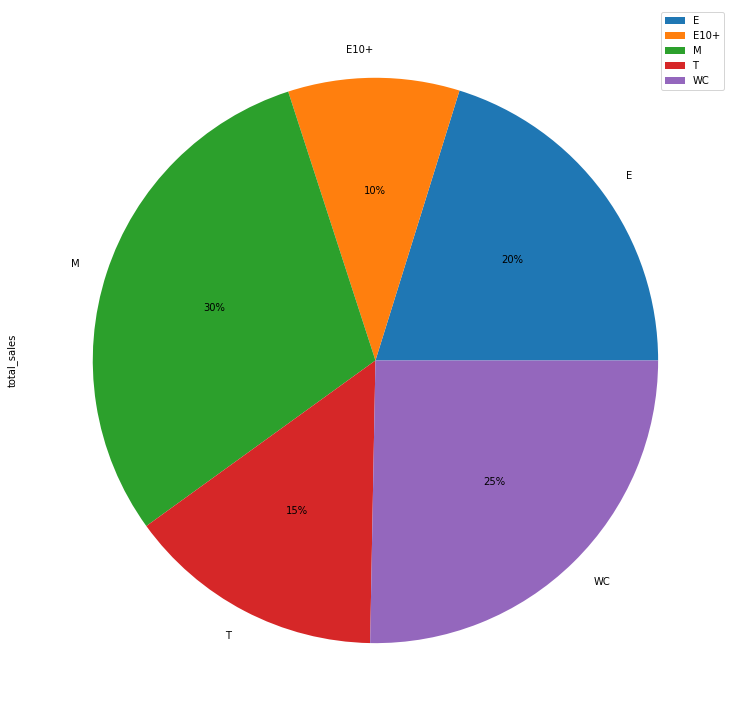

In [67]:
evro_data.groupby(['rating']).sum().plot(kind = 'pie', y = 'total_sales', autopct = '%1.0f%%', figsize=(13,13) )

Около 30% игр, купленных в Европе проходят с маркировкой "М", т.е для лиц, старше 16ти, что логично, если учесть, что самый популярный жанр - стрелялки, на втором месте с 25% идёт "WC", т.е. немаркированные , что неудивительно, потому как маркировка ESRB принята для игр, продаваемых в США и Канаде . Наименее популярный рейтинг 10 и старше.

Япония. Повторим всё тоже для страны восходящего солнца.

In [68]:
japon_data = data_from_2015.query('jp_sales != 0')
japon_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,WC,14.63
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,WC,7.98
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,WC,7.39


In [69]:
japon_data_platform = pd.pivot_table(evro_data, index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
japon_data_platform

,jp_sales
platform,
3DS,11.80
PS4,8.27
WiiU,4.00
PS3,1.76
PSV,1.74
XOne,0.18
PC,0.00
Wii,0.00
X360,0.00


<AxesSubplot:ylabel='total_sales'>

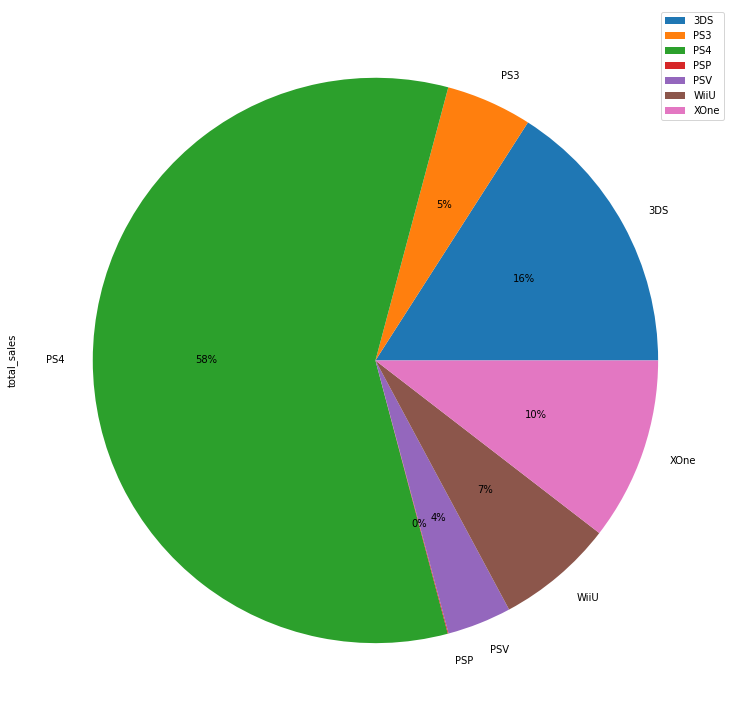

In [70]:
japon_data.groupby(['platform']).sum().plot(kind = 'pie', y = 'total_sales', autopct = '%1.0f%%', figsize=(13,13))

Из пирога очевидно, что японцы предпочитают "PS4" в 58% случаев и совсем уж не уважают "PSP"(<1%)

<AxesSubplot:ylabel='total_sales'>

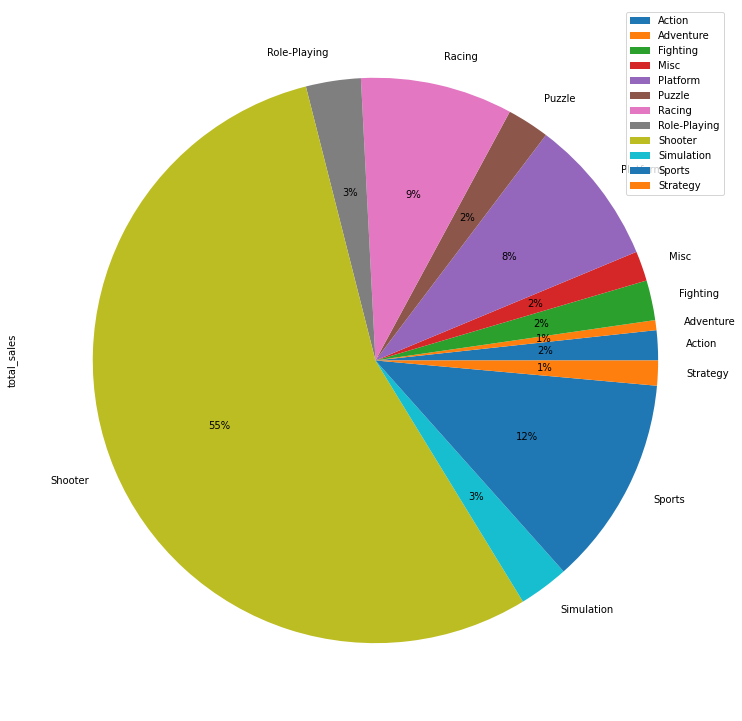

In [71]:
japon_data.groupby(['genre']).median().plot(kind = 'pie', y = 'total_sales', autopct = '%1.0f%%', figsize=(13,13) )


С большим отрывом от "Sports"(12%) лидируют стрелялки(55%), меньше всего покупают стратегии(1%) и приключения(1%)

<AxesSubplot:ylabel='total_sales'>

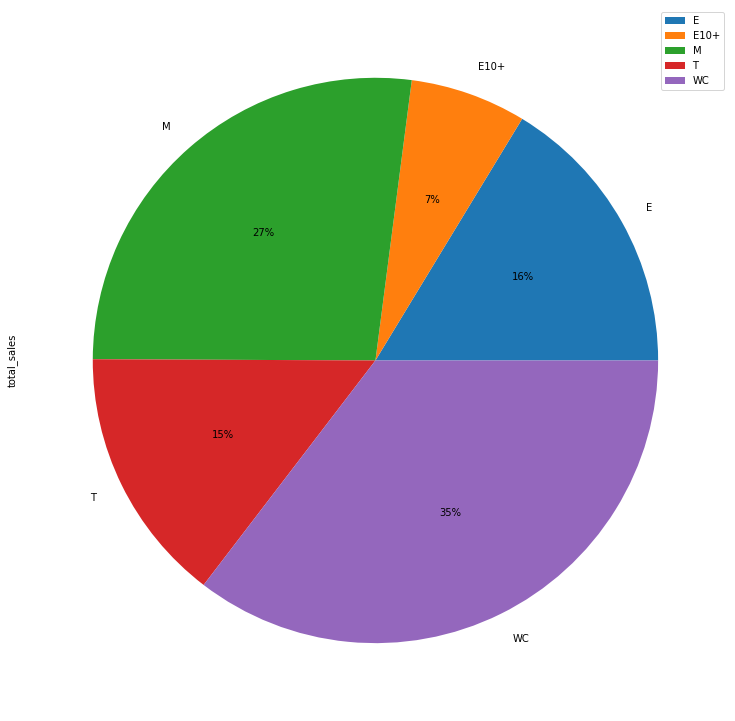

In [72]:
japon_data.groupby(['rating']).sum().plot(kind = 'pie', y = 'total_sales', autopct = '%1.0f%%', figsize=(13,13) )

В Японии тоже больше всего игр продается без маркировки ESRB(35%), видимо у японцев есть свои рейтинги, на втором месте игры с маркировкой "М"(27%), меньше всего "Е10+(7%).

Теперь Северная Америка.

In [73]:
na_data = data_from_2015.query('na_sales != 0')
na_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,WC,14.63
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,WC,7.98
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,WC,7.39


In [74]:
na_data_platform = pd.pivot_table(evro_data, index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_data_platform

,na_sales
platform,
PS4,61.65
XOne,49.72
3DS,9.67
WiiU,8.86
X360,7.66
PS3,5.39
PC,3.69
Wii,0.49
PSV,0.43


<AxesSubplot:ylabel='total_sales'>

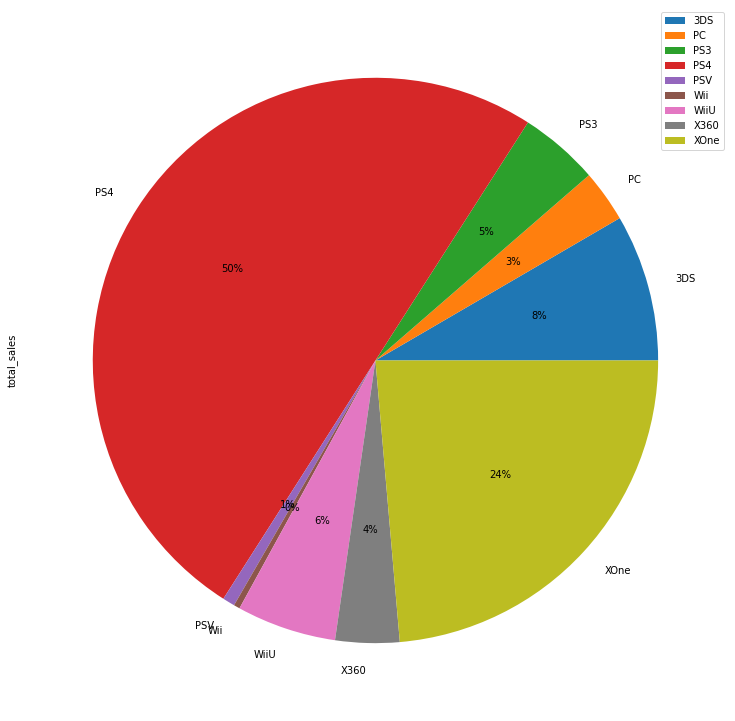

In [75]:
na_data.groupby(['platform']).sum().plot(kind = 'pie', y = 'total_sales', autopct = '%1.0f%%', figsize=(13,13))

Половина американцев Северной Америки предпочитает "PS4",наименее охотно американцы покупают "Wii"(<1%)

<AxesSubplot:ylabel='total_sales'>

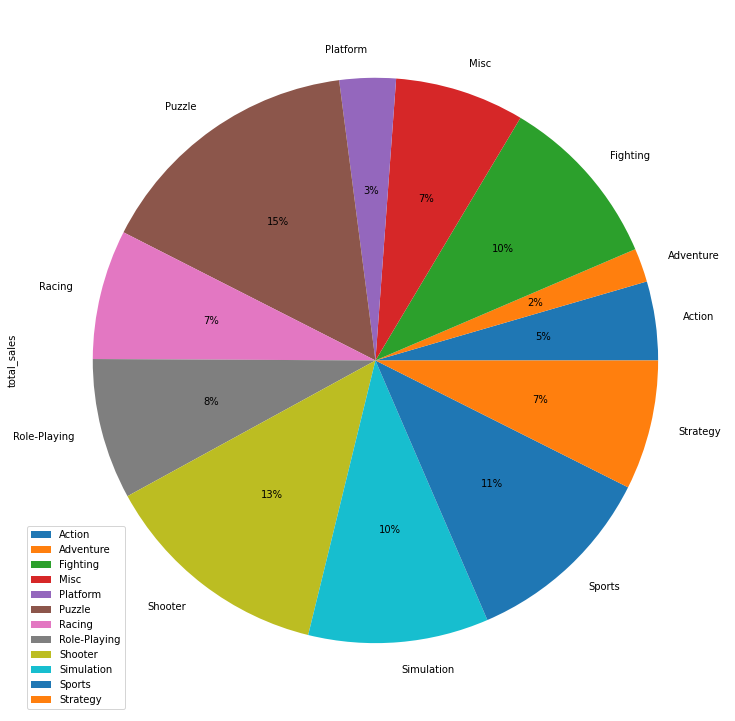

In [76]:
na_data.groupby(['genre']).median().plot(kind = 'pie', y = 'total_sales', autopct = '%1.0f%%', figsize=(13,13) )

К моему удивлению, наиболее стабильнымы в Северной Америке оказываются игры жанра "Puzzle"(15%).Американцы, так же как и европейцы и японцы, любят стрелялки и спортивные игры, а вот приключенческие игры продаются хуже всех.

<AxesSubplot:ylabel='total_sales'>

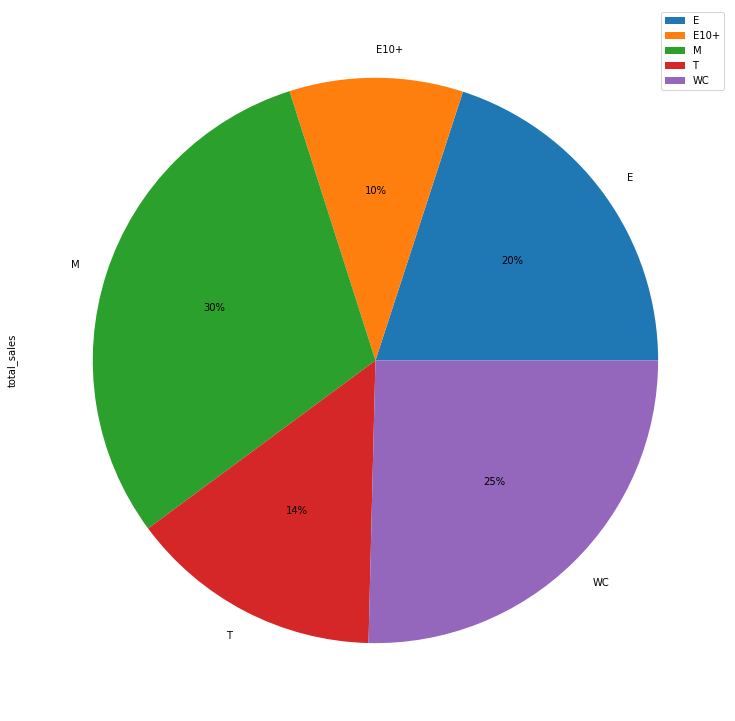

In [77]:
na_data.groupby(['rating']).sum().plot(kind = 'pie', y = 'total_sales', autopct = '%1.0f%%', figsize=(13,13) )

В Северной Америке больше всего игр продаётся с маркировкой "М"(30%), на втором месте игры без маркировки(25%) и меньше всего с маркировкой "Е10+"(10%)

Вывод:   
    во всех трёх регионах самой популярной платформой является платформа  "PS4". В Европе её предпочитают 49% покупателей, в Северной Америке  50%, а в Японии 58%. На втором месте у европейцев и американцев "XOne" (23% и 24% соответственно), у японцев - "3DS"(16%). Наименее популярной у европейцев и американцев оказалась платформа "Wii"(<1%), а у японцев - "PSP"(<1%).
     Что касается игр, то во всех регионах популярным жанром оказался "Shooter"( в Европе	23%, в Японии 55%, в С.Америке 13%), также популярными являются "Sports", "Misc", "Fighting".В Северной Америке стабильной популярностью пользуются "Puzzle"/ Меньше всего во всех регионах любят приключенческие игры.
     Больше всего игр в Европе и Северной Америке продаётся с маркировкой "М"(Европа  и Северная Америка по 30%, в Японии - 27%), а в Японии на первом месте игры без рейтинга ESRB  - 35%. Меньше всего игр продается в категории "Е10+".
     Вероятнее всего, в 2017г  во всех регионах больше всего прибыли принесут стрелялки и  спортивные игры  для платформы 'PS4'.Самой перспективной среди  ESRB является маркировка "М".

### Проверка гипотез

Нам предлагают две гипотезы:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим первую из них:

In [78]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Поскольку в списке платформ я название "Xbox One" не нашла, то осмелюсь предположить, что речь идет о нашем "XOne", который мы отобрали в паре с "PS4" как одину из самых потенциально прибыльных на 2017г платформ. 
Итак, если нулевая гипотеза H₀ звучит как: средние пользовательские рейтинги платформ ХОпе и РС одинаковые, то альтернативная гипотеза H₁ звучит как: средние пользовательские рейтинги платформ ХОпе и РС отличаются.


In [79]:
xone_user_score = data_from_2015.query('platform == "XOne"')

Уберём пропуски в оценках

In [80]:
xone_user_score = xone_user_score[xone_user_score['user_score'].notna()]["user_score"]
xone_user_score.describe()

count    121.000000
mean       6.542149
std        1.458010
min        1.600000
25%        5.800000
50%        6.700000
75%        7.700000
max        9.200000
Name: user_score, dtype: float64

Сделаем то же самое для "PC"

In [81]:
pc_user_score = data_from_2015.query('platform == "PC"')

In [82]:
pc_user_score = pc_user_score[pc_user_score['user_score'].notna()]["user_score"]
pc_user_score.describe()

count    84.000000
mean      6.296429
std       1.763789
min       1.400000
25%       5.025000
50%       6.900000
75%       7.600000
max       9.300000
Name: user_score, dtype: float64

Не мудрствуя лукаво, возьмём уровень статистической значимости, равный .05

In [83]:
alpha = .05
results = st.ttest_ind(pc_user_score, xone_user_score)
print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2778542084733835
не получилось отвергнуть нулевую гипотезу


Поскольку отвергнуть нулевую гипотезу не удалось, будем считать что средние пользовательские рейтинги платформ ХОпе и РС одинаковые.

Рассмотрим вторую гипотезу. Здесь речь идет о различии жанров, значит нулевая гипотеза будет обратной.     
H₀ - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.   


H₁ - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для подготовки данных возьму таблицу за актуальный период

In [84]:
action_user_score = data.query('genre == "Action"')

In [85]:
action_user_score = data_from_2015[data_from_2015['user_score'].notna()]['user_score']

In [86]:
sports_user_score = data.query('genre == "Sports"')

In [87]:
sports_user_score = sports_user_score[sports_user_score['user_score'].notna()]['user_score']

оставим уровень статистической значимости .05

In [88]:
alpha1 = .05
results1 = st.ttest_ind(action_user_score, sports_user_score)
print("p-значение:", results1.pvalue)

if results1.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00035212290718286064
отвергаем нулевую гипотезу


Поскольку нулевая гипотеза говорит о том, что рейтинги спортивных и экшн игр равны, а мы её отвергли, то можно сказать, что рейтинги спортивных и экшн игр разные, т.е. второе утверждение правильно.

Вывод:   
По результатам проведенного статистического анализа были сделаны выводы о том что:   
1.пользовательские рейтинги платформ ХОпе и РС равны   
2.пользовательские рейтинги спортивных и экшн игр разные

### Общий вывод:   

Для интернет-магазина "Стримчик" была проведена работа по анализу данных из датасета с информацией о продажах компьютерных игр. 
В исследуемой таблице были выявленны пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. В столбце User_Score содержался строковый тип данных, который необходимо было заменить на float. Кроме того, в названиях столбцов содержались заглавные буквы.

 Названия столбцов были приведены к нижнему регистру. В столбцах year_of_release и critic_score тип данных был заменён на int. Тип данных в столбце user_score был переведен во float. Предварительно в этом столбце данные "tbd" были заменены NaN-ом. В некоторых столбцах присутствовали пропуски. Особенно много было их в столбцах "user_score", "critic_score", "rating". В столбце 'rating' пропуски заменила значением "wc" - without cathegory. Пропуски в столбцах "year_of_release" и "name" привели к удалению строк с этими столбцами. В таблицу был добавлен столбец "total_sales" с суммой продаж по всем регионам, необходимый для дальнейшего анализа.

Был проведён исследовательский анализ данных, в результате которого был выбран актуальный период для дальнейшего построения прогноза на 2017г. Это 2015-2016г. Самыми потенциально прибыльными признаны "XOne" и "PS4". Была исследована корреляция между отзывами игроков, критиков и уровнем продаж. По результатам можно сказать, что во всех случаях между отзывами критиков и уровнем продаж существует положительная корреляция. Между отзывами игроков и уровнем продаж картина разниться в зависимости от платформы. Мы наблюдали как отрицательную корреляцию ("XOne" и "PS4"), так и положительную, достигающую 40% на платформе "WiiU". Самыми прибыльными среди жанров, оказались жанры 'Shooter', "Sports" и "Role-Playing". Хуже всего продаются "Adventure" и "Puzzle".

Был проведен исследовательский анализ по трём регионам: Европе, Японии и Северной Америке в отношении популярности различных платформ, жанров игры и возрастного рейтинга компании ESRD.   
Во всех трёх регионах самой популярной платформой является платформа "PS4". В Европе её предпочитают 49% покупателей, в Северной Америке 50%, а в Японии 58%. На втором месте у европейцев и американцев "XOne" (23% и 24% соответственно), у японцев - "3DS"(16%). Наименее популярной у европейцев и американцев оказалась платформа "Wii"(<1%), а у японцев - "PSP"(<1%).   
Что касается игр, то во всех регионах популярным жанром оказался "Shooter"( в Европе 23%, в Японии 55%, в С.Америке 13%), также популярными являются "Sports", "Misc", "Fighting".В Северной Америке стабильной популярностью пользуются "Puzzle". Меньше всего во всех регионах любят приключенческие игры. Большое всего игр в Европе и Северной Америке продаётся с маркировкой компании ESRD "М"(Европа и Северная Америка по 30%, в Японии - 27%), но в Японии на первом месте игры без рейтинга ESRB - 35%. Также популярны игры без рейтинга и в Северной Америке, и в Европе. Возможно имеет смысл провести исследование по рейтингу какой-нибудь европейской рейтинговой компании. Это должно улучшить прогноз относительно рейтинга.  Меньше всего игр продается в категории "Е10+". Вероятнее всего, в 2017г во всех регионах больше всего прибыли принесут стрелялки и спортивные игры для платформы 'PS4'.Самой перспективной среди игр с маркировкой ESRB, является маркировка "М".

Было проверено две гипотезы:   
1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;   
2.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.   
Обе гипотезы подтвердились, т.е.
1.пользовательские рейтинги платформ ХОпе и РС одинаковые,
2.пользовательские рейтинги спортивных и экшн игр разные.